In [18]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [19]:
class Walker:
    def __init__(self, col='tab:blue'):
        self.r = np.array([0.,0.])   # x and y positions of the walkers, starting at the origin
        self.col = col
    
    def move(self):
        Deltar = np.array([0.,0.])   # x and y displacements of the walkers
        theta = 2*np.pi*np.random.rand()
        Deltar[0] = np.cos(theta)
        Deltar[1] = np.sin(theta)
        self.r += Deltar
    
    def run(self, Nsteps):   # instead of taking a step, updating the plot, taking a setp, ..., we take Nsteps steps at once
        for i in range(Nsteps):
            self.move()
    
    def distance(self):
        d = (self.r[0]**2 + self.r[1]**2)**0.5
        return d

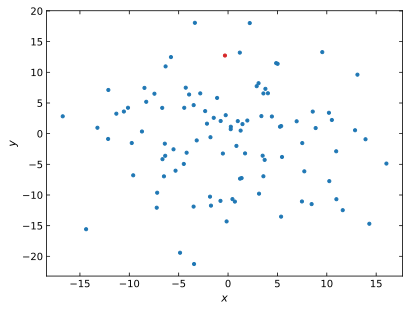

In [20]:
col_list = ['tab:blue']*100
col_list[-1] = 'tab:red'
fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
for color in col_list:
    W = Walker()
    W.run(100)
    ax.scatter(W.r[0], W.r[1], s=10, c=color)